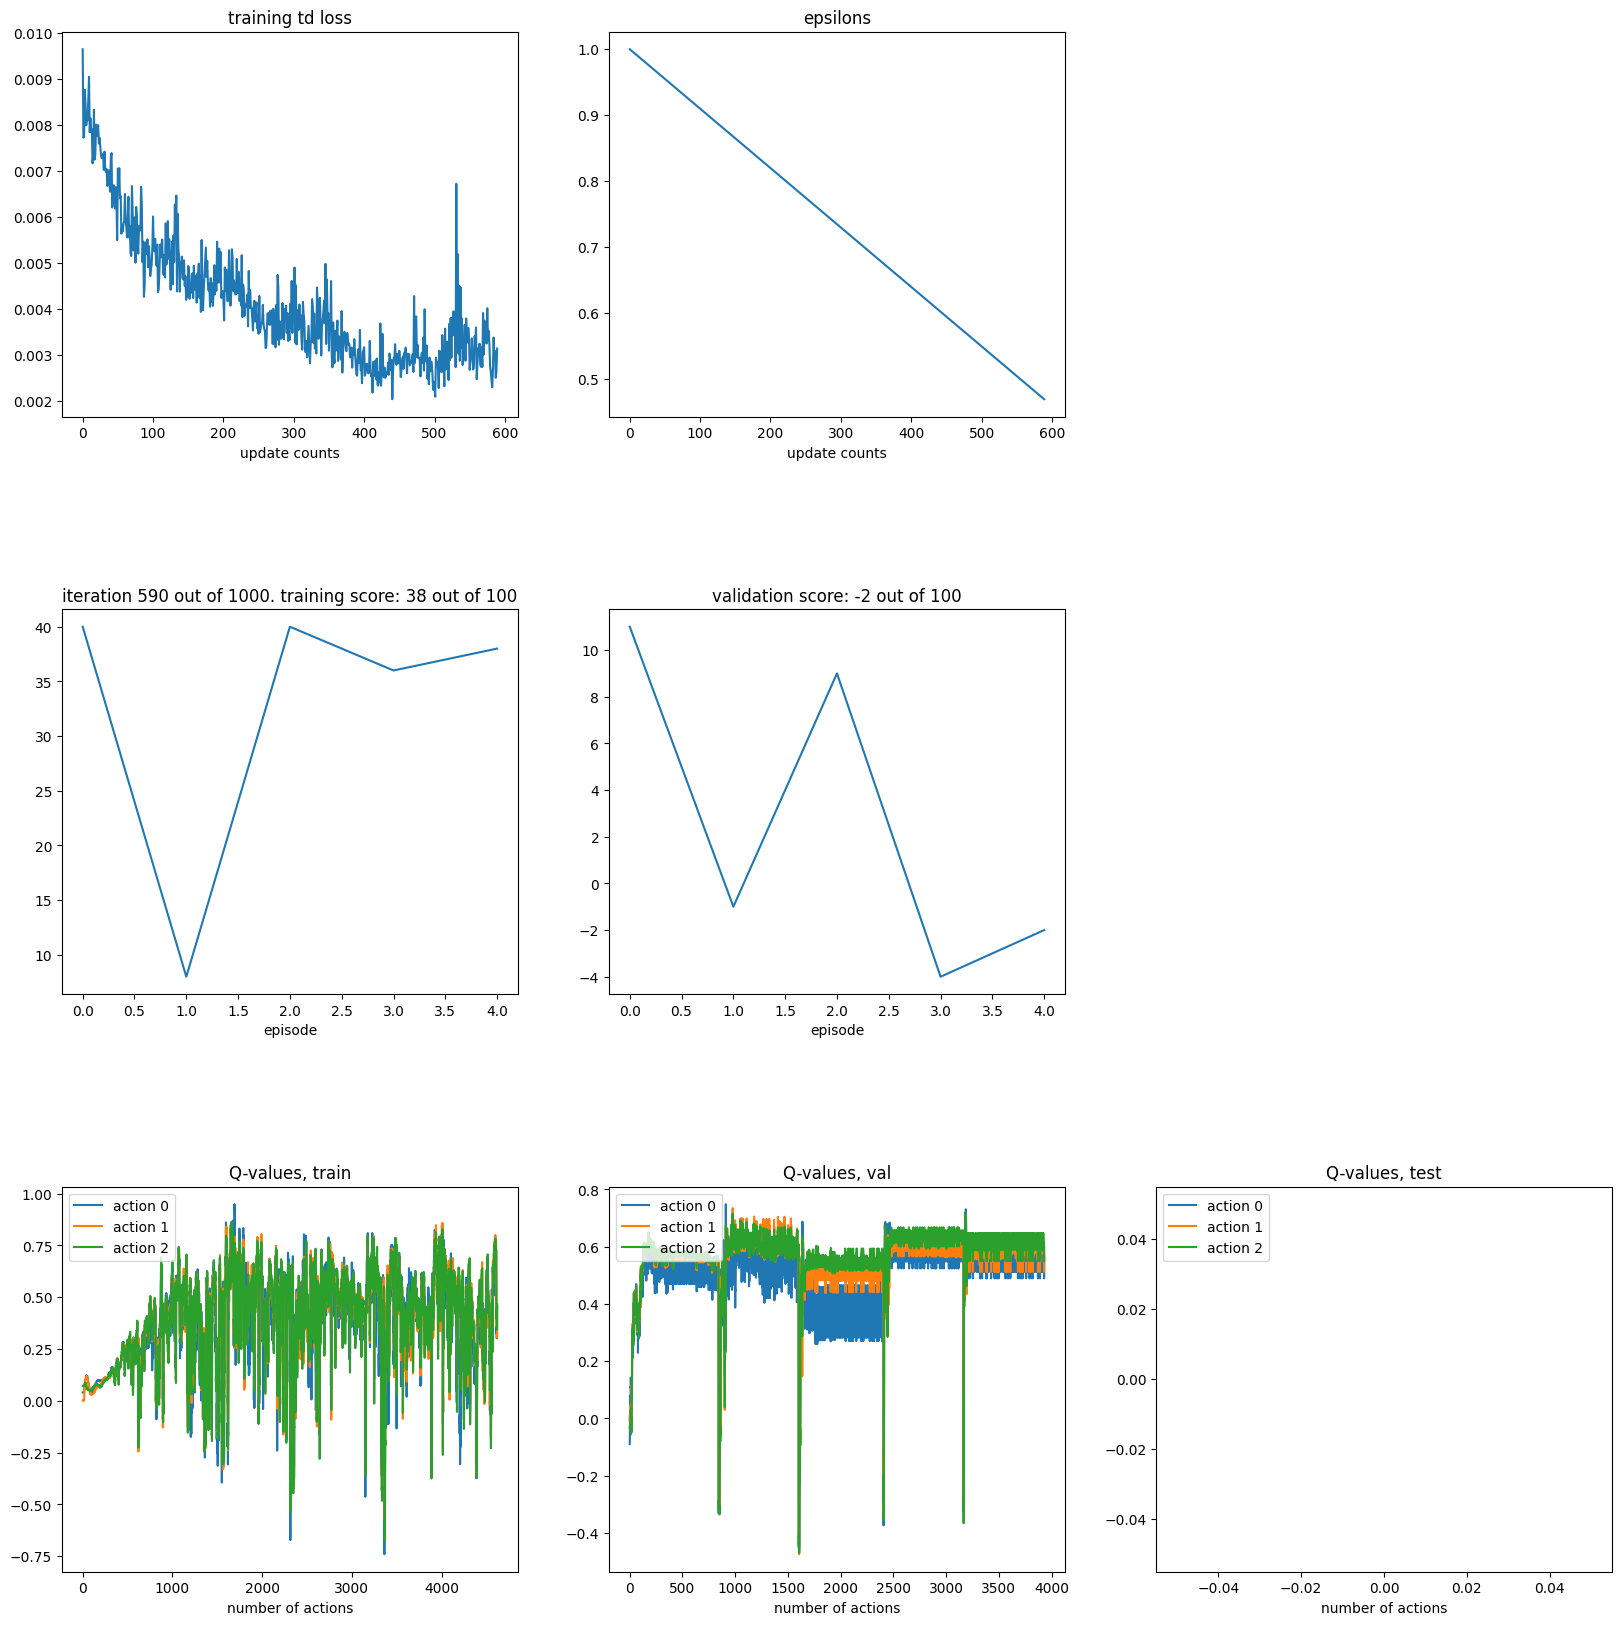

/home/tk/.virtualenvs/human-memory/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.return_room_layout to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.return_room_layout` for environment variables or `env.get_wrapper_attr('return_room_layout')` that will search the reminding wrappers.
  logger.warn(


In [1]:
from agent.dqn import DQNMMAgent
import random
import logging

logger = logging.getLogger()
logger.disabled = True

while True:
    batch_size = random.choice([128, 256, 512, 1024])
    warm_start = random.choice(
        [batch_size, 2 * batch_size, 4 * batch_size, 8 * batch_size]
    )
    replay_buffer_size = random.choice(
        [warm_start, 2 * warm_start, 4 * warm_start, 8 * warm_start]
    )
    config = {
        "question_prob": 1.0,
        "terminates_at": 99,
        "randomize_observations": random.choice([True, False]),
        "room_size": "s",
    }
    all_params = {
        "env_str": "room_env:RoomEnv-v2",
        "max_epsilon": 1.0,
        "min_epsilon": 0.1,
        "epsilon_decay_until": 100 * 10,
        "gamma": random.random(),
        "capacity": {
            "episodic": 16,
            "episodic_agent": 16,
            "semantic": 16,
            "short": 1,
        },
        "nn_params": {
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 32,
            "v1_params": None,
            "v2_params": {},
            "memory_of_interest": [
                "episodic",
                "semantic",
                "short",
            ],
        },
        "num_iterations": 100 * 10,
        "replay_buffer_size": replay_buffer_size,
        "warm_start": warm_start,
        "batch_size": batch_size,
        "target_update_rate": 10,
        "pretrain_semantic": False,
        "run_test": True,
        "num_samples_for_results": 10,
        "train_seed": 5,
        "plotting_interval": 10,
        "device": "cpu",
        "test_seed": 0,
        "qa_policy": "episodic_semantic",
        "explore_policy": "avoid_walls",
        "env_config": config,
        "ddqn": True,
        "dueling_dqn": True,
        "split_reward_training": random.choice([True, False]),
    }

    agent = DQNMMAgent(**all_params)
    agent.train()